Importing libs

In [264]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statstests.process import stepwise
from sklearn.metrics import confusion_matrix, accuracy_score,\
    ConfusionMatrixDisplay, recall_score
from sklearn.preprocessing import LabelEncoder
pd.set_option("display.max_rows", None)

In [265]:
#'/kaggle/input/student-depression-dataset/Student Depression Dataset.csv'
dataset_path = 'Student Depression Dataset.csv'
df = pd.read_csv(dataset_path)
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [267]:
df.rename(columns={
    'Academic Pressure': 'AP',
    'Work Pressure':'WP',
    'Study Satisfaction':'SS',
    'Job Satisfaction':'JS',
    'Sleep Duration':'SD',
    'Dietary Habits':'DH',
    'Have you ever had suicidal thoughts ?':'ST',
    'Work/Study Hours':'WSH',
    'Financial Stress':'FS',
    'Family History of Mental Illness':'FHMI'
},inplace=True)

In [268]:
df.dropna( inplace=True)

In [269]:
df.drop(columns='id',inplace=True)

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27898 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      27898 non-null  object 
 1   Age         27898 non-null  float64
 2   City        27898 non-null  object 
 3   Profession  27898 non-null  object 
 4   AP          27898 non-null  float64
 5   WP          27898 non-null  float64
 6   CGPA        27898 non-null  float64
 7   SS          27898 non-null  float64
 8   JS          27898 non-null  float64
 9   SD          27898 non-null  object 
 10  DH          27898 non-null  object 
 11  Degree      27898 non-null  object 
 12  ST          27898 non-null  object 
 13  WSH         27898 non-null  float64
 14  FS          27898 non-null  float64
 15  FHMI        27898 non-null  object 
 16  Depression  27898 non-null  int64  
dtypes: float64(8), int64(1), object(8)
memory usage: 3.8+ MB


Gender

In [271]:
df['Gender'].value_counts().sort_index()

Gender
Female    12352
Male      15546
Name: count, dtype: int64

In [272]:
df['Gender'] = df['Gender'].replace({'Female':0,'Male':1}).astype('int64')

/tmp/ipykernel_33947/2386521945.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Female':0,'Male':1}).astype('int64')


Age

In [273]:
df['Age'].value_counts().sort_index()

Age
18.0    1587
19.0    1560
20.0    2236
21.0    1726
22.0    1160
23.0    1645
24.0    2258
25.0    1784
26.0    1155
27.0    1462
28.0    2133
29.0    1949
30.0    1145
31.0    1427
32.0    1261
33.0    1893
34.0    1468
35.0      10
36.0       7
37.0       2
38.0       8
39.0       3
41.0       1
42.0       4
43.0       2
44.0       1
46.0       2
48.0       3
49.0       1
51.0       1
54.0       1
56.0       1
58.0       1
59.0       1
Name: count, dtype: int64

In [274]:
df.query('Age < 35',inplace=True)

In [275]:
df['Age'].describe()

count    27849.000000
mean        25.795827
std          4.862033
min         18.000000
25%         21.000000
50%         25.000000
75%         30.000000
max         34.000000
Name: Age, dtype: float64

City

In [276]:
df['City'].value_counts()

City
Kalyan                1567
Srinagar              1370
Hyderabad             1337
Vasai-Virar           1289
Lucknow               1153
Thane                 1138
Ludhiana              1108
Agra                  1091
Surat                 1076
Kolkata               1062
Jaipur                1036
Patna                 1003
Pune                   967
Visakhapatnam          966
Ahmedabad              951
Bhopal                 932
Chennai                883
Meerut                 823
Rajkot                 813
Delhi                  767
Bangalore              766
Ghaziabad              743
Mumbai                 698
Vadodara               693
Varanasi               683
Nagpur                 650
Indore                 643
Kanpur                 609
Nashik                 545
Faridabad              461
Saanvi                   2
Bhavna                   2
City                     2
Harsha                   2
Less Delhi               1
M.Tech                   1
3.0                    

In [277]:
filtered_cities = df['City'].value_counts()[lambda x: x > 2].index.tolist()
df.query('City in @filtered_cities',inplace=True)

In [278]:
df['City'].value_counts()

City
Kalyan           1567
Srinagar         1370
Hyderabad        1337
Vasai-Virar      1289
Lucknow          1153
Thane            1138
Ludhiana         1108
Agra             1091
Surat            1076
Kolkata          1062
Jaipur           1036
Patna            1003
Pune              967
Visakhapatnam     966
Ahmedabad         951
Bhopal            932
Chennai           883
Meerut            823
Rajkot            813
Delhi             767
Bangalore         766
Ghaziabad         743
Mumbai            698
Vadodara          693
Varanasi          683
Nagpur            650
Indore            643
Kanpur            609
Nashik            545
Faridabad         461
Name: count, dtype: int64

Profession

In [279]:
df['Profession'].value_counts()

Profession
Student                   27792
Architect                     8
Teacher                       6
Digital Marketer              3
Chef                          2
Content Writer                2
Pharmacist                    2
Doctor                        2
UX/UI Designer                1
Civil Engineer                1
Manager                       1
Educational Consultant        1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

In [280]:
df.query('Profession == "Student"',inplace=True)
df.drop(columns=['Profession'],axis=1,inplace=True)

Academic Pressure

In [281]:
df['AP'].value_counts().sort_index()

AP
0.0       7
1.0    4782
2.0    4164
3.0    7429
4.0    5142
5.0    6268
Name: count, dtype: int64

In [282]:
df.query('AP > 0.0 ', inplace=True)

Work Pressure 

In [283]:
df['WP'].value_counts().sort_index()

WP
0.0    27785
Name: count, dtype: int64

In [284]:
df.drop(columns=['WP'],inplace=True)

CGPA

In [285]:
df['CGPA'].value_counts()

CGPA
8.0400     821
9.9600     424
5.7400     408
8.9500     370
9.2100     341
7.2500     337
7.0900     319
7.8800     317
9.4400     316
8.9100     275
9.9300     274
7.7700     269
8.7400     267
7.1000     250
9.7200     249
5.6400     245
9.3900     242
6.9900     241
6.3700     238
7.5300     234
6.7800     232
9.2400     224
8.5900     220
5.8500     215
6.1600     215
5.1600     209
8.5800     207
7.9400     207
5.8800     207
8.1700     196
5.3200     194
8.2400     194
5.5600     178
9.5600     175
8.1400     174
6.1000     167
5.1200     166
5.5700     164
8.9000     164
5.3700     159
9.7100     157
6.8900     153
6.0000     153
9.8900     151
9.4100     151
9.6300     149
6.8300     149
6.2500     147
6.7500     143
5.8200     143
8.7300     142
7.0400     141
8.9600     141
9.6000     140
9.8600     140
9.7900     139
9.9700     139
5.7600     139
9.6700     135
7.4700     134
8.5400     133
9.9500     133
8.6200     133
9.7400     129
8.7000     128
7.2200     127
6.210

In [286]:
filtered_cgpa = df['CGPA'].value_counts()[lambda x: x > 9].index.tolist()
df.query('CGPA in @filtered_cgpa',inplace=True)

<Axes: ylabel='CGPA'>

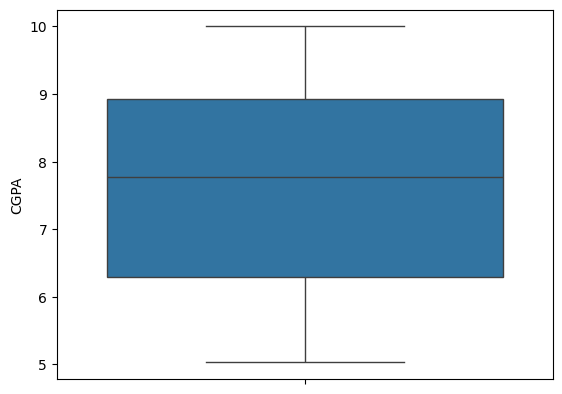

In [287]:
sns.boxplot(data=df['CGPA'])

In [288]:
df['CGPA'].describe()

count    27742.000000
mean         7.660137
std          1.464945
min          5.030000
25%          6.290000
50%          7.770000
75%          8.920000
max         10.000000
Name: CGPA, dtype: float64

Study Satisfaction

In [289]:
df['SS'].value_counts().sort_index()

SS
0.0       2
1.0    5417
2.0    5815
3.0    5786
4.0    6327
5.0    4395
Name: count, dtype: int64

In [290]:
df.query('SS > 0.0 ', inplace=True)

Job Satisfaction 

In [291]:
df['JS'].value_counts().sort_index()

JS
0.0    27738
2.0        1
3.0        1
Name: count, dtype: int64

In [292]:
df.drop(columns=['JS'],inplace=True)

Sleep Duration

In [293]:
df['SD'].value_counts().sort_index()

SD
5-6 hours            6141
7-8 hours            7300
Less than 5 hours    8268
More than 8 hours    6013
Others                 18
Name: count, dtype: int64

In [294]:
df.query('SD != "Others" ', inplace=True)

In [295]:
mapping = {
    'Less than 5 hours': 1,
    '5-6 hours': 2,
    '7-8 hours': 3,
    'More than 8 hours': 4
}

df['SD'] = df['SD'].map(mapping)

Dietary Habits

In [296]:
df['DH'].value_counts().sort_index()

DH
Healthy       7600
Moderate      9856
Others          12
Unhealthy    10254
Name: count, dtype: int64

In [297]:
df.query('DH != "Others" ', inplace=True)

In [298]:
mapping = {
    'Healthy': 0,
    'Moderate': 1,
    'Unhealthy': 3
}

df['DH'] = df['DH'].map(mapping)

Degree

In [299]:
df['Degree'].value_counts().sort_index(ascending=False)

Degree
PhD          514
Others        35
MSc         1181
MHM          190
ME           184
MD           566
MCA         1032
MBBS         686
MBA          560
MA           542
M.Tech      1017
M.Pharm      578
M.Ed         814
M.Com        730
LLM          480
LLB          666
Class 12    6044
BSc          879
BHM          920
BE           605
BCA         1425
BBA          692
BA           593
B.Tech      1149
B.Pharm      807
B.Ed        1854
B.Com       1496
B.Arch      1471
Name: count, dtype: int64

Have you ever had suicidal thoughts ?

In [300]:
df['ST'].value_counts().sort_index()

ST
No     10170
Yes    17540
Name: count, dtype: int64

In [301]:
mapping = {
    'No':0,
    'Yes':1
}

df['ST'] = df['ST'].map(mapping)

Work/Study Hours

In [302]:
df['WSH'].value_counts().sort_index()


WSH
0.0     1686
1.0     1140
2.0     1573
3.0     1458
4.0     1600
5.0     1283
6.0     2234
7.0     1987
8.0     2499
9.0     2012
10.0    4216
11.0    2876
12.0    3146
Name: count, dtype: int64

Financial Stress

In [303]:
df['FS'].value_counts().sort_index()

FS
1.0    5092
2.0    5029
3.0    5186
4.0    5742
5.0    6661
Name: count, dtype: int64

Family History of Mental Illness

In [304]:
df['FHMI'].value_counts().sort_index()

FHMI
No     14301
Yes    13409
Name: count, dtype: int64

In [305]:
df['FHMI']= df['FHMI'].replace({'No':0,'Yes':1}).astype('int64')

/tmp/ipykernel_33947/2442579037.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['FHMI']= df['FHMI'].replace({'No':0,'Yes':1}).astype('int64')


Depression

In [306]:
df['Depression'].value_counts().sort_index()

Depression
0    11475
1    16235
Name: count, dtype: int64

Algorithm

In [307]:
df.head()

,Gender,Age,City,AP,CGPA,SS,SD,DH,Degree,ST,WSH,FS,FHMI,Depression
0,1,33.0,Visakhapatnam,5.0,8.97,2.0,2,0,B.Pharm,1,3.0,1.0,0,1
1,0,24.0,Bangalore,2.0,5.90,5.0,2,1,BSc,0,3.0,2.0,1,0
2,1,31.0,Srinagar,3.0,7.03,5.0,1,0,BA,0,9.0,1.0,1,0
3,0,28.0,Varanasi,3.0,5.59,2.0,3,1,BCA,1,4.0,5.0,1,1
4,0,25.0,Jaipur,4.0,8.13,3.0,2,1,M.Tech,1,1.0,1.0,0,0


In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27710 entries, 0 to 27900
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      27710 non-null  int64  
 1   Age         27710 non-null  float64
 2   City        27710 non-null  object 
 3   AP          27710 non-null  float64
 4   CGPA        27710 non-null  float64
 5   SS          27710 non-null  float64
 6   SD          27710 non-null  int64  
 7   DH          27710 non-null  int64  
 8   Degree      27710 non-null  object 
 9   ST          27710 non-null  int64  
 10  WSH         27710 non-null  float64
 11  FS          27710 non-null  float64
 12  FHMI        27710 non-null  int64  
 13  Depression  27710 non-null  int64  
dtypes: float64(6), int64(6), object(2)
memory usage: 3.2+ MB


In [309]:
df_dummies = pd.get_dummies(df, columns=['City'], dtype=int, drop_first=True)

In [310]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27710 entries, 0 to 27900
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              27710 non-null  int64  
 1   Age                 27710 non-null  float64
 2   AP                  27710 non-null  float64
 3   CGPA                27710 non-null  float64
 4   SS                  27710 non-null  float64
 5   SD                  27710 non-null  int64  
 6   DH                  27710 non-null  int64  
 7   Degree              27710 non-null  object 
 8   ST                  27710 non-null  int64  
 9   WSH                 27710 non-null  float64
 10  FS                  27710 non-null  float64
 11  FHMI                27710 non-null  int64  
 12  Depression          27710 non-null  int64  
 13  City_Ahmedabad      27710 non-null  int64  
 14  City_Bangalore      27710 non-null  int64  
 15  City_Bhopal         27710 non-null  int64  
 16  City_Chen

Model

In [311]:
df_dummies.columns = df_dummies.columns.str.replace('-', '_', regex=True)

list_colums_dummies = list(df_dummies.drop(columns=['Depression']).columns)
formula_dummies_model = ' + '.join(list_colums_dummies)
formula_dummies_model = 'Depression ~ ' + formula_dummies_model

In [318]:
df_dummies.shape

(27710, 43)

In [312]:
model = sm.Logit.from_formula(formula_dummies_model,df_dummies).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.347102
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Depression   No. Observations:                27710
Model:                          Logit   Df Residuals:                    27642
Method:                           MLE   Df Model:                           67
Date:                sáb, 01 fev 2025   Pseudo R-squ.:                  0.4883
Time:                        16:11:30   Log-Likelihood:                -9618.2
converged:                       True   LL-Null:                       -18796.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -3.2254      0.223    -14.477      0.000      -3.662      -2.789
Degree[T.B.Com]       -0.1257      0.115     -1.089      0.276      -0.352       0.100
Degree[T.B.Ed]        -0.0300      0.110     -0.272      0.786      -0.246       0.186
Degree[T.B.Pharm]     -0.0939      0.134     -0.700      0.484      -0.357       0.169
Degree[T.B.Tech]       0.0809      0.123      0.658      0.510      -0.160       0.322
Degree[T.BA]          -0.2035      0.144     -1.408      0.159      -0.487       0.080
Degree[T.BBA]          0.0315      0.140      0.225      0.822      -0.243       0.306
Degree[T.BCA]         -0.0501      0.115     -0.437      0.662      -0.275       0.174
Degree[T.BE]           0.0181      0.143      0.127      0.899      -0.262       0.299
Degree[T.BHM]         -0.1282      0.130     -0.985      0.325      -0.383       0.127
Degree[T.BSc]          0.1303      0.132      0.986      0.324      -0.129       0.389
Degree[T.Class 12]    -0.2051      0.096     -2.127      0.033      -0.394      -0.016
Degree[T.LLB]          0.1537      0.141      1.086      0.277      -0.124       0.431
Degree[T.LLM]          0.2766      0.160      1.731      0.083      -0.037       0.590
Degree[T.M.Com]       -0.0341      0.140     -0.244      0.807      -0.308       0.240
Degree[T.M.Ed]         0.0677      0.136      0.498      0.619      -0.199       0.334
Degree[T.M.Pharm]     -0.0190      0.150     -0.126      0.899      -0.313       0.275
Degree[T.M.Tech]      -0.1123      0.127     -0.885      0.376      -0.361       0.137
Degree[T.MA]          -0.1231      0.150     -0.820      0.412      -0.417       0.171
Degree[T.MBA]         -0.1788      0.149     -1.200      0.230      -0.471       0.113
Degree[T.MBBS]         0.1336      0.141      0.948      0.343      -0.143       0.410
Degree[T.MCA]          0.0546      0.125      0.436      0.663      -0.191       0.300
Degree[T.MD]           0.0486      0.151      0.322      0.747      -0.247       0.344
Degree[T.ME]          -0.1111      0.232     -0.479      0.632      -0.566       0.343
Degree[T.MHM]          0.0172      0.223      0.077      0.938      -0.420       0.454
Degree[T.MSc]         -0.1438      0.120     -1.196      0.232      -0.380       0.092
Degree[T.Others]       0.5241      0.485      1.080      0.280      -0.427       1.475
Degree[T.PhD]          0.1449      0.156      0.929      0.353      -0.161       0.451
Gender                -0.0102      0.037     -0.274      0.784      -0.083       0.063
Age                   -0.1211      0.005    -23.980      0.000      -0.131      -0.111
AP                     0.8413      0.015     55.858      0.000       0.812       0.871
CGPA                   0.0571      0.013      4.525      0.000       0.032       0.082
SS                    -0.2432      0.014    -17.730      0.000      -0.270      -0.216
SD                    -0.1900      0.016    -11.567      0.000      -0.222      -0.158
DH                    

StepWise

In [313]:
stepwise_model = stepwise(model,pvalue_limit=0.05)

Regression type: Logit 

Estimating model...: 
 Depression ~ Q('Degree[T.B.Com]') + Q('Degree[T.B.Ed]') + Q('Degree[T.B.Pharm]') + Q('Degree[T.B.Tech]') + Q('Degree[T.BA]') + Q('Degree[T.BBA]') + Q('Degree[T.BCA]') + Q('Degree[T.BE]') + Q('Degree[T.BHM]') + Q('Degree[T.BSc]') + Q('Degree[T.Class 12]') + Q('Degree[T.LLB]') + Q('Degree[T.LLM]') + Q('Degree[T.M.Com]') + Q('Degree[T.M.Ed]') + Q('Degree[T.M.Pharm]') + Q('Degree[T.M.Tech]') + Q('Degree[T.MA]') + Q('Degree[T.MBA]') + Q('Degree[T.MBBS]') + Q('Degree[T.MCA]') + Q('Degree[T.MD]') + Q('Degree[T.ME]') + Q('Degree[T.MHM]') + Q('Degree[T.MSc]') + Q('Degree[T.Others]') + Q('Degree[T.PhD]') + Q('Gender') + Q('Age') + Q('AP') + Q('CGPA') + Q('SS') + Q('SD') + Q('DH') + Q('ST') + Q('WSH') + Q('FS') + Q('FHMI') + Q('City_Ahmedabad') + Q('City_Bangalore') + Q('City_Bhopal') + Q('City_Chennai') + Q('City_Delhi') + Q('City_Faridabad') + Q('City_Ghaziabad') + Q('City_Hyderabad') + Q('City_Indore') + Q('City_Jaipur') + Q('City_Kalyan') + Q('C

In [314]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Depression   No. Observations:                27710
Model:                          Logit   Df Residuals:                    27692
Method:                           MLE   Df Model:                           17
Date:                sáb, 01 fev 2025   Pseudo R-squ.:                  0.4865
Time:                        16:12:40   Log-Likelihood:                -9651.4
converged:                       True   LL-Null:                       -18796.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -3.0646      0.191    -16.061      0.000      -3.439      -2.691
Q('Degree[T.Class 12]')    -0.1599      0.057     -2.784      0.005      -0.272      -0.047
Q('Degree[T.LLM]')          0.2865      0.137      2.095      0.036       0.018       0.554
Q('Age')                   -0.1185      0.005    -24.376      0.000      -0.128      -0.109
Q('AP')                     0.8388      0.015     56.091      0.000       0.809       0.868
Q('CGPA')                   0.0571      0.013      4.564      0.000       0.033       0.082
Q('SS')                    -0.2442      0.014    -17.904      0.000      -0.271      -0.218
Q('SD')                    -0.1905      0.016    -11.652      0.000      -0.223      -0.158
Q('DH')                     0.3548      0.015     23.619      0.000       0.325       0.384
Q('ST')                     2.5192      0.039     64.164      0.000       2.442       2.596
Q('WSH')                    0.1170      0.005     23.447      0.000       0.107       0.127
Q('FS')                     0.5524      0.013     41.284      0.000       0.526       0.579
Q('FHMI')                   0.2473      0.037      6.765      0.000       0.176       0.319
Q('City_Ahmedabad')         0.3332      0.102      3.252      0.001       0.132       0.534
Q('City_Bhopal')            0.2024      0.100      2.015      0.044       0.006       0.399
Q('City_Hyderabad')         0.3117      0.087      3.597      0.000       0.142       0.481
Q('City_Kolkata')           0.2258      0.100      2.267      0.023       0.031       0.421
Q('City_Patna')             0.2215      0.097      2.273      0.023       0.031       0.412
===========================================================================================
"""

In [316]:
def matriz_confusao(predicts, observado, cutoff):
    
    values = predicts.values
    
    predicao_binaria = []
        
    for item in values:
        if item < cutoff:
            predicao_binaria.append(0)
        else:
            predicao_binaria.append(1)
           
    cm = confusion_matrix(predicao_binaria, observado)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.xlabel('True')
    plt.ylabel('Classified')
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    plt.show()
        
    sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
    especificidade = recall_score(observado, predicao_binaria, pos_label=0)
    acuracia = accuracy_score(observado, predicao_binaria)

    #Visualizando os principais indicadores desta matriz de confusão
    indicadores = pd.DataFrame({'Sensitividade':[sensitividade],
                                'Especificidade':[especificidade],
                                'Acurácia':[acuracia]})
    return indicadores

In [315]:
df_dummies['phat'] = stepwise_model.predict()

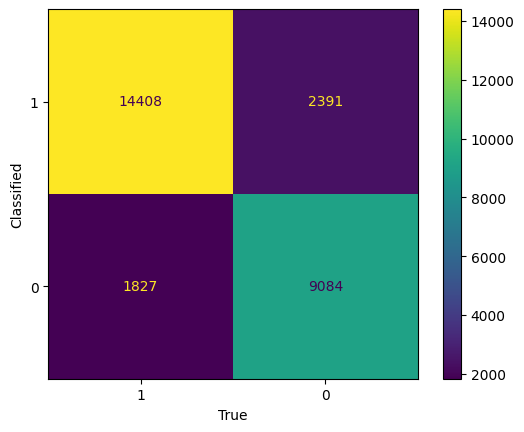

,Sensitividade,Especificidade,Acurácia
0,0.887465,0.791634,0.847781


In [317]:
matriz_confusao(observado=df_dummies['Depression'],
                predicts=df_dummies['phat'],
                cutoff=0.5)